In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.neural_network import MLPClassifier as nn
from sklearn.linear_model import LogisticRegression as lr
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.datasets import make_moons, make_circles

In [2]:
import matplotlib as mpl

def get_data(n, d=2, gamma=1):
    mean0 = np.array([-d, d])
    mean1 = np.array([d, -d])
    
    cov = gamma*np.eye(2)
    
    x0 = np.random.multivariate_normal(
        mean0, cov, n//2
    )
    
    x1 = np.random.multivariate_normal(
        mean1, cov, n//2
    )

    X = np.concatenate((x0, x1), axis=0)
    y = np.ones((n, ))
    y[:n//2] = 0

    return X, y

def plot_decision_boundary(clf, X, y, ax, extra=1, lim=3):
    resolution=0.05
    x1_min, x1_max = X[:, 0].min() - extra, X[:, 0].max() + extra
    x2_min, x2_max = X[:, 1].min() - extra, X[:, 1].max() + extra
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    newx = np.array([xx1.ravel(), xx2.ravel()]).T
#     Z = clf.predict_proba(newx)[:, 1]
    Z = clf.predict(newx)
    Z = Z.reshape(xx1.shape)
    
    cmap = mpl.cm.Spectral
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.75, edgecolor='k', zorder=2, cmap=mpl.cm.Spectral)
    v=ax.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap, zorder=1)

    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())

#     ax.set_xlim(-lim, lim)
#     ax.set_ylim(-lim, lim)

    return v, ax

In [2]:
X, y = get_data(200, d=1.5, gamma=0.1)
clf = nn(max_iter=5000).fit(X, y)

NameError: name 'get_data' is not defined

In [4]:
surrogate = lr(C=1e-2, penalty='l1', solver='liblinear').fit(X, y)

In [5]:
resolution=0.20
extra = 1
x1_min, x1_max = X[:, 0].min() - extra, X[:, 0].max() + extra
x2_min, x2_max = X[:, 1].min() - extra, X[:, 1].max() + extra
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))
newx = np.array([xx1.ravel(), xx2.ravel()]).T
newy = clf.predict(newx)

surr2 = lr().fit(newx, newy)

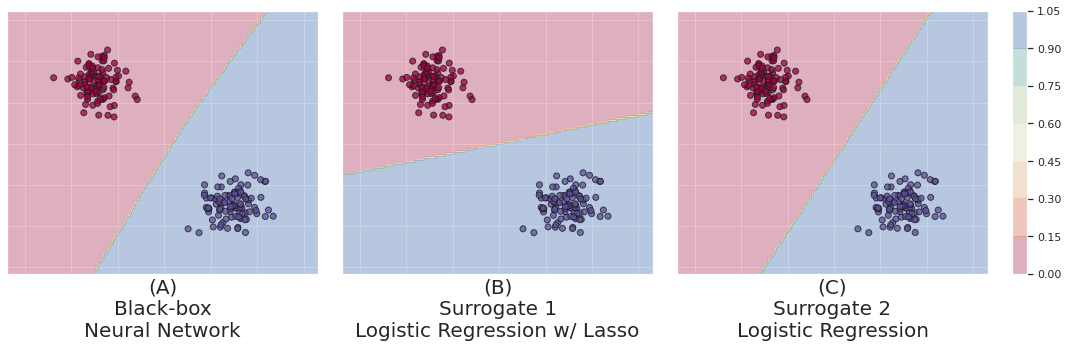

In [6]:
fig, axes = plt.subplots(
    1, 4, figsize=(15, 5),
#     sharex=True, sharey=True,
    gridspec_kw={"width_ratios":[1,1,1,0.05]}
)
v0, _ = plot_decision_boundary(clf, X, y, axes[0])
v1, _ = plot_decision_boundary(surrogate, X, y, axes[1])
v2, _ = plot_decision_boundary(surr2, X, y, axes[2])

fig.colorbar(v0, cax=axes[3])
# plt.show()

for ax in axes[:3]:
    plt.setp( ax.get_xticklabels(), visible=False)
    plt.setp( ax.get_yticklabels(), visible=False)

    
xlabels = [
    '(A)\nBlack-box\nNeural Network',
    '(B)\nSurrogate 1\nLogistic Regression w/ Lasso',
    '(C)\nSurrogate 2\nLogistic Regression',
]

for ii, xlabel in enumerate(xlabels):
    axes[ii].set_xlabel(xlabel, fontsize=20)
    
plt.tight_layout()
plt.subplots_adjust(wspace=0.10)

plt.savefig('global_surrogates_comparison.png', dpi=200)

In [4]:
X, y = make_moons(200, noise=0.025)

In [8]:
clf = nn(max_iter=5000).fit(X, y)
dtclf = dtc().fit(X, y)
lrclf = lr().fit(X, y)

In [9]:
resolution=0.01
extra = 1
x1_min, x1_max = X[:, 0].min() - extra, X[:, 0].max() + extra
x2_min, x2_max = X[:, 1].min() - extra, X[:, 1].max() + extra
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))
XX = np.array([xx1.ravel(), xx2.ravel()]).T
YY = clf.predict(XX)

In [10]:
dtclf2 = dtc().fit(newx, newy)
lrclf2 = lr().fit(newx, newy)

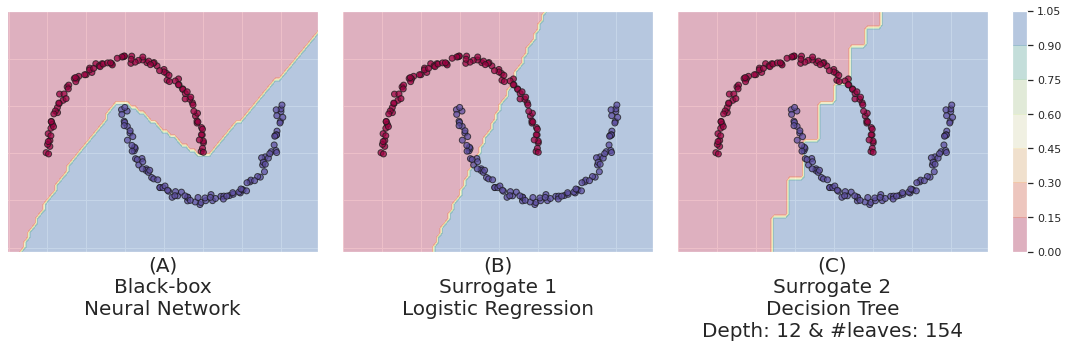

In [11]:
fig, axes = plt.subplots(
    1, 4, figsize=(15, 5),
    gridspec_kw={"width_ratios":[1,1,1,0.05]}
)

extra = 0.50
lim = 2

v0, _ = plot_decision_boundary(clf, X, y, axes[0], extra=extra, lim=lim)
v1, _ = plot_decision_boundary(lrclf2, X, y, axes[1], extra=extra, lim=lim)
v2, _ = plot_decision_boundary(dtclf2, X, y, axes[2], extra=extra, lim=lim)

fig.colorbar(v0, cax=axes[3])
# plt.show()

for ax in axes[:3]:
    plt.setp( ax.get_xticklabels(), visible=False)
    plt.setp( ax.get_yticklabels(), visible=False)

    
xlabels = [
    '(A)\nBlack-box\nNeural Network',
    '(B)\nSurrogate 1\nLogistic Regression',
    '(C)\nSurrogate 2\nDecision Tree\nDepth: 12 & #leaves: 154',
]

for ii, xlabel in enumerate(xlabels):
    axes[ii].set_xlabel(xlabel, fontsize=20)
    
plt.tight_layout()
plt.subplots_adjust(wspace=0.10)

# plt.savefig('global_surrogates_comparison.png', dpi=200)

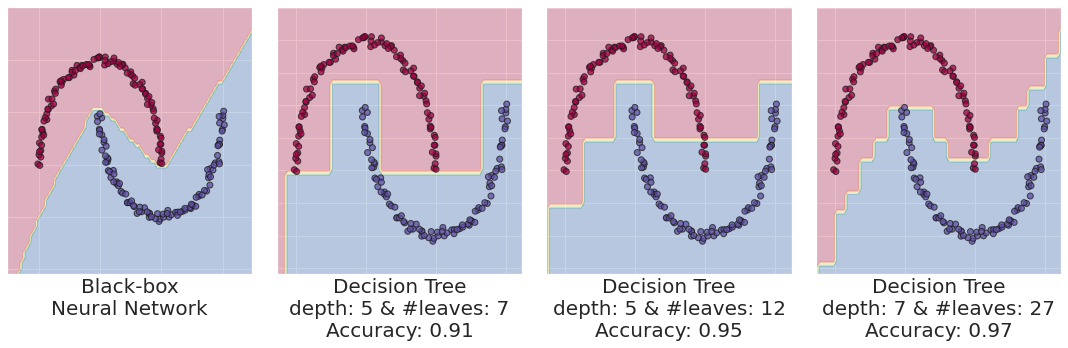

In [12]:
resolutions = [
    0.70, 0.50, 0.20,
]


fig, axes = plt.subplots(
    1, 4, figsize=(15, 5),
#         gridspec_kw={"width_ratios":[1,1,1,0.05]}
)
axes = axes.ravel()
    
ax=axes[0]
v0, _ = plot_decision_boundary(clf, X, y, ax, extra=extra, lim=lim) 
plt.setp( ax.get_xticklabels(), visible=False)
plt.setp( ax.get_yticklabels(), visible=False)

ax.set_xlabel(f'Black-box\nNeural Network', fontsize=20)
    
for ii, resolution in enumerate(resolutions):
    ax = axes[ii+1]
    
    extra = 0.50
    x1_min, x1_max = X[:, 0].min() - extra, X[:, 0].max() + extra
    x2_min, x2_max = X[:, 1].min() - extra, X[:, 1].max() + extra
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    newx = np.array([xx1.ravel(), xx2.ravel()]).T
    newy = clf.predict(newx)

    dtclf2 = dtc().fit(newx, newy)

    extra = 0.25
    lim = 2

    v0, _ = plot_decision_boundary(dtclf2, X, y, ax, extra=extra, lim=lim)

#     fig.colorbar(v0, cax=axes[3])
    # plt.show()

    plt.setp( ax.get_xticklabels(), visible=False)
    plt.setp( ax.get_yticklabels(), visible=False)

    score = dtclf2.score(XX, YY)
    ax.set_xlabel(
        f'Decision Tree\ndepth: {dtclf2.get_depth()} & #leaves: {dtclf2.get_n_leaves()}\nAccuracy: {round(score, 2)}',
        fontsize=20,
    )
    
    
#     xlabels = [
#         '(A)\nBlack-box\nNeural Network',
#         '(B)\nSurrogate 1\nLogistic Regression',
#         '(C)\nSurrogate 2\nDecision Tree\nDepth: 12 & #leaves: 154',
#     ]

#     for ii, xlabel in enumerate(xlabels):
#         axes[ii].set_xlabel(xlabel, fontsize=20)

plt.tight_layout()
plt.subplots_adjust(wspace=0.10)

plt.savefig('global_surrogates_comparison_2.png', dpi=200)

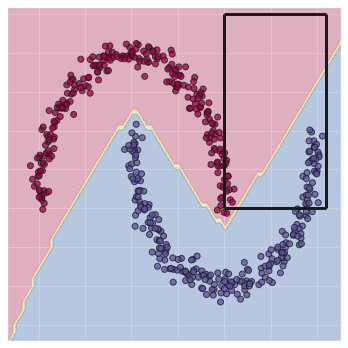

In [31]:
fig, ax = plt.subplots(
    1, 1, figsize=(5, 5),
#         gridspec_kw={"width_ratios":[1,1,1,0.05]}
)
    
v0, _ = plot_decision_boundary(clf, X, y, ax, extra=extra, lim=lim) 
plt.setp( ax.get_xticklabels(), visible=False)
plt.setp( ax.get_yticklabels(), visible=False)

# ax.set_xlabel(f'Black-box\nNeural Network', fontsize=20)

kwargs = {
    'color': 'k',
    'linewidth': 3,
}
ax.vlines(1, 0, 1.25, **kwargs)
ax.vlines(2.10, 0, 1.25, **kwargs)

ax.hlines(0, 1, 2.10, **kwargs)
ax.hlines(1.25, 1, 2.10, **kwargs)

plt.tight_layout()
plt.subplots_adjust(wspace=0.10)

plt.savefig('focus_locally.png', dpi=200)

In [24]:
X, y = make_moons(500, noise=0.05)
clf = nn(max_iter=5000).fit(X, y)
newy = clf.predict(X)

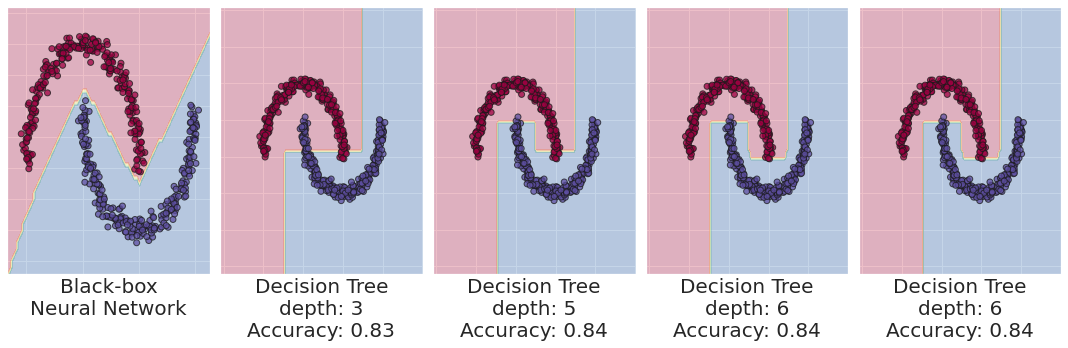

In [25]:
depths = [
    3, 5, 8, 12,
]


fig, axes = plt.subplots(
    1, 5, figsize=(15, 5),
#         gridspec_kw={"width_ratios":[1,1,1,0.05]}
)
axes = axes.ravel()
    
ax=axes[0]
v0, _ = plot_decision_boundary(clf, X, y, ax, extra=extra, lim=lim) 
plt.setp( ax.get_xticklabels(), visible=False)
plt.setp( ax.get_yticklabels(), visible=False)

ax.set_xlabel(f'Black-box\nNeural Network', fontsize=20)
    
for ii, depth in enumerate(depths):
    ax = axes[ii+1]

    dtclf2 = dtc(max_depth=depth).fit(X, newy)

    extra = 0.25
    lim = 2

    v0, _ = plot_decision_boundary(dtclf2, X, y, ax, lim=2)

#     fig.colorbar(v0, cax=axes[3])
    # plt.show()

    plt.setp( ax.get_xticklabels(), visible=False)
    plt.setp( ax.get_yticklabels(), visible=False)

    score = dtclf2.score(XX, YY)
    ax.set_xlabel(
        f'Decision Tree\ndepth: {dtclf2.get_depth()}\nAccuracy: {round(score, 2)}',
        fontsize=20,
    )
    
    
#     xlabels = [
#         '(A)\nBlack-box\nNeural Network',
#         '(B)\nSurrogate 1\nLogistic Regression',
#         '(C)\nSurrogate 2\nDecision Tree\nDepth: 12 & #leaves: 154',
#     ]

#     for ii, xlabel in enumerate(xlabels):
#         axes[ii].set_xlabel(xlabel, fontsize=20)

plt.tight_layout()
plt.subplots_adjust(wspace=0.05)

# plt.savefig('global_surrogates_comparison_2.png', dpi=200)

In [5]:
resolution=0.05; extra=1
xx0, xx1 = np.meshgrid(
    np.arange(X[:, 0].min() - extra, X[:, 0].max() + extra, resolution),
    np.arange(X[:, 1].min() - extra, X[:, 1].max() + extra, resolution)
)
X_s = np.array([xx0.ravel(), xx1.ravel()]).T